In [63]:
import os 
import sys
import pandas as pd
import matplotlib.pyplot as plt
import glob
import datetime
import numpy as np
import matplotlib.dates as mdates

In [64]:
#importing Citibike and Covid data

#covid = pd.read_csv("covid_cases.csv")
#citi2020 = pd.read_csv("finalciti_2020.csv")

#merging covid and citibike
#citi_covid = pd.merge(citi2020, covid, on = "Date", how = "outer")
#citi_covid = citi_covid.dropna()
#citi_covid.head()

#Covid = pd.read_csv("covid_cases.csv")
#citi2020 = pd.read_csv("finalciti_2020.csv")
#daily_citi_trips = citi2020.groupby('Date').count().reset_index()
#merging covid and citibike
#citi2020["trip"] = citi2020.groupby('Date').count().reset_index()
#citi_covid = pd.merge(citi2020, citi2020, on = "Date", how = "outer")
#citi_covid
#citi2020.head()

covid = pd.read_csv("covid_cases.csv")
citi2020 = pd.read_csv("finalciti_2020.csv")
daily_citi_trips = citi2020.groupby('Date').count()['trips'].reset_index()


In [65]:
daily_citi_trips.shape

(122, 2)

In [66]:
#merging covid and citibike
citi_covid = pd.merge(covid, daily_citi_trips, on = "Date", how = "outer")

In [67]:
len(citi_covid)

122

In [68]:
citi_covid.head()

,Unnamed: 0,Date,Case Count,Hospitalized Count,Death Count,trips
0,1,2020-03-01,0,4,0,1530
1,2,2020-03-02,0,21,0,2451
2,3,2020-03-03,2,20,0,2337
3,4,2020-03-04,5,22,0,2598
4,5,2020-03-05,3,20,0,2694


In [69]:
citi_covid.rename(columns={"Unnamed: 0":"trip", "trips": "user"})

,trip,Date,Case Count,Hospitalized Count,Death Count,user
0,1,2020-03-01,0,4,0,1530
1,2,2020-03-02,0,21,0,2451
2,3,2020-03-03,2,20,0,2337
3,4,2020-03-04,5,22,0,2598
4,5,2020-03-05,3,20,0,2694
...,...,...,...,...,...,...
117,118,2020-06-26,311,34,20,4281
118,119,2020-06-27,208,37,21,4101
119,120,2020-06-28,202,32,19,4158
120,121,2020-06-29,437,39,24,3648


In [70]:
#newdf = citi_covid.groupby(["trips", "Date", "Case Count", "Hospitalized Count","Death Count"]).size().to_frame('size').reset_index()
#covidcitidf = newdf.sort_values(by=['Date'])
#covidcitidf

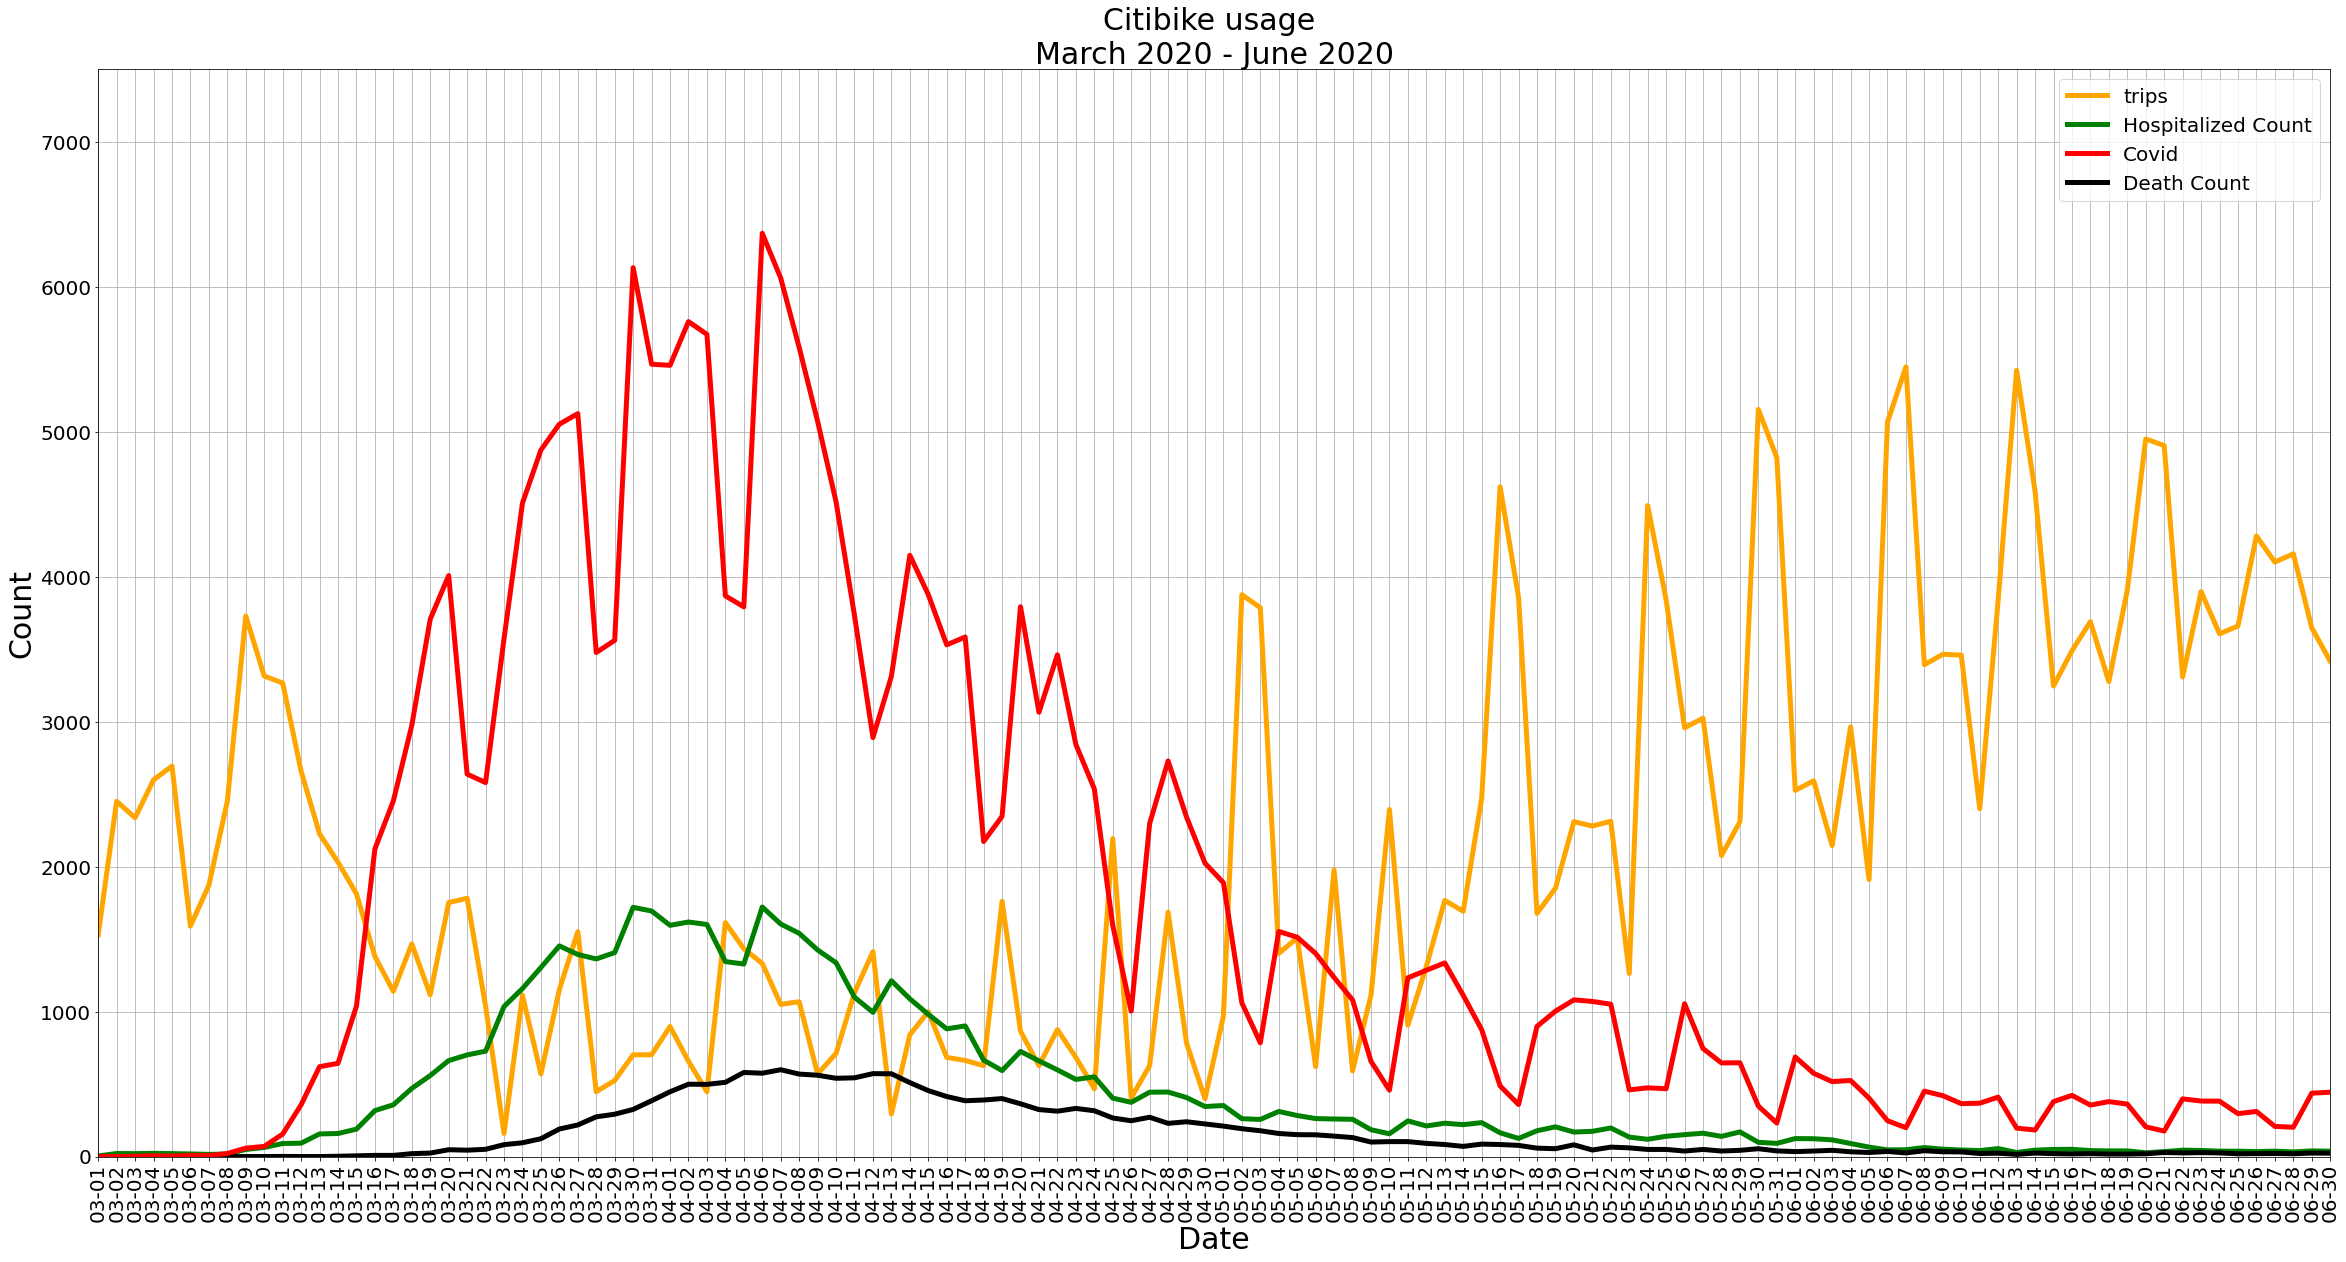

In [71]:
#get the values of x and y axis 
dates = citi_covid["Date"]
x = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
y = citi_covid["trips"]
g = citi_covid["Hospitalized Count"]
f = citi_covid["Death Count"]
c = citi_covid["Case Count"]

fig, ax = plt.subplots(figsize=(40, 20))
#get axes
ax = plt.gca()
#format as dates
formatter = mdates.DateFormatter("%m-%d")
#set locator
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
ax.grid(True)

#plot values
trips, = plt.plot(x,y,c='orange',linewidth=5,label='trips')
Hospitalized, = plt.plot(x,g,c='green',linewidth=5, label='Hospitalized Count')
Deaths, =plt.plot(x,f,c='black',linewidth=5, label='Death Count')
covid, = plt.plot(x,c,c='red',linewidth=5, label='Covid')

#set labels, lim, size, titile and legend on the graph
plt.xlabel("Date", fontsize = 30)
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(datetime.date(2020, 3, 1), datetime.date(2020, 6, 30))
plt.ylabel("Count", fontsize = 30)
plt.ylim(0, 7500)
plt.title("Citibike usage \nMarch 2020 - June 2020", fontsize = 30)

plt.legend(handles=[trips,Hospitalized,covid,Deaths], loc="best",prop={'size': 20})

#plt.tight_layout()
plt.show()

In [72]:
fig.savefig('citi_covid.png', dpi = 40)